# Python for Data Science Project

## Dataset = American Bank

### Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from pandas_profiling import ProfileReport
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from sklearn.base import BaseEstimator
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
import pandas_profiling

### Content:
* Introduction
* From Problem to approach
    * Problem overview
    * Business understanding
    * Project overview
* From Requirement to collection
    * Dataset overview
    * Dataset importing
* From understanding to preparation
    * Data understanding
    * Exploratory data analysis
    * Data preparation
* From Modeling to evaluation
* From deployment to feedback

### Intorduction:


Individuals and organizations around the world depend on loans especially with the
ever increasing competition in the financial world and the significant amount of financial
constraints that exists in our daily lives.

Although loan lending is quite beneficial for both the lenders and the receivers and
is considered an essential part of the financial organization, it does carry some great
risks. This type of risk represents the inability of the receiver to pay back the loan at the
designated time which was decided upon by the lender and the borrower, during the
loan origination and is referred to as Credit risk.

### From Problem to approach

#### Problem overview
Credit risk is known to cause major concerns among the financial institutes as it can result
in a dire situation known as credit defaulting which is what we are trying to predict
in this project.

While in the past, the financial institutes focused on employing highly professional
individuals whose sole purpose was to evaluate whether a candidate was eligible for
receiving a loan based on statistical algorithms to accurately predict the worthiness of
a candidate for loan approval or rejection.

Quite recently, however, the researchers and institutes have opted for training classifiers
based onmachine learning algorithms and neural networks to automatically predict
the credit score of an individual based on their historical data.

#### Business Understanding
* Question:
What is the best way to decrease credit risk?
* Goal:
Decrease the credit risk by avoiding loaning money to potential defaulting clients.
* Objectives:
    * Use available data to determine the traits of a defaulting client.
    * Predict whether a new client is ’good’ or ’bad’.
* Business requirements:
    * Predict defaulting outcome for each client
    * Predict defaulting risk for each client
    * Understand the combination of traits that describe a defaulting client.
    * Applying an easy to understand process to new clients to predict their defaulting risk.

#### Project overview
In this project, we were asked to experiment with 3 real world datasets, and to explore
howmachine learning algorithms can be used to predict results based on initial data.To
do so, we treated each dataset separately and we trained the data with multiple algorithms
in order to determine the best one in terms of accuracy. The results are set to
be displayed in the formof an online dashboard and to be further explained in a report.

###  From Requirement to collection

#### Dataset overview
The American Bank dataset contains baseline and loan performance information for
__5,960__ recent home equity loans. The target __(BAD)__ is a binary variable indicating whether
an applicant eventually defaulted or was seriously delinquent. This adverse outcome
occurred in __1,189__ cases __(20%)_. For each applicant, _12 input variables were recorded_.

#### Dataset importing

In [2]:
data = pd.read_csv("america.csv")

In [3]:
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


### From understanding to preparation

In [5]:
data['JOB'].unique()

array(['Other', nan, 'Office', 'Sales', 'Mgr', 'ProfExe', 'Self'],
      dtype=object)

#### Data Understanding

In [9]:
pfr = pandas_profiling.ProfileReport(data)
pfr.to_notebook_iframe() 

#### Exploratory data analysis

In [10]:
# Payed loans 
data[data['BAD']==0].drop('BAD', axis=1).describe().style.format("{:.2f}")

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,4771.00,4359.00,4764.00,4321.00,4150.00,4263.00,4541.00,4336.00,4602.00,4290.00
mean,19028.11,74829.25,102595.92,9.15,0.13,0.25,187.00,1.03,21.32,33.25
std,11115.76,43584.99,52748.39,7.68,0.51,0.67,84.47,1.53,9.68,6.95
min,1700.00,2619.00,8000.00,0.00,0.00,0.00,0.49,0.00,0.00,0.72
25%,11700.00,47484.00,67297.75,3.00,0.00,0.00,120.22,0.00,15.00,28.91
50%,16900.00,66839.00,90659.00,7.00,0.00,0.00,180.42,1.00,20.00,34.54
75%,23500.00,93068.00,120615.50,13.00,0.00,0.00,240.16,2.00,26.00,38.74
max,89900.00,371003.00,471827.00,36.00,6.00,5.00,649.75,11.00,56.00,45.57


In [11]:
# Defaulted loans
data[data['BAD']==1].drop('BAD', axis=1).describe().style.format("{:.2f}")

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,1189.00,1083.00,1084.00,1124.00,1102.00,1117.00,1111.00,1114.00,1136.00,403.00
mean,16922.12,69460.45,98172.85,8.03,0.71,1.23,150.19,1.78,21.21,39.39
std,11418.46,47588.19,74339.82,7.10,1.47,1.90,84.95,2.25,11.81,17.72
min,1100.00,2063.00,8800.00,0.00,0.00,0.00,0.00,0.00,0.00,0.52
25%,9200.00,39946.50,59368.25,2.00,0.00,0.00,96.03,0.00,13.00,32.38
50%,14900.00,60279.00,82000.00,6.00,0.00,0.00,132.87,1.00,20.00,38.08
75%,21700.00,85864.50,116000.00,12.00,1.00,2.00,193.28,3.00,28.00,43.29
max,77400.00,399550.00,855909.00,41.00,10.00,15.00,1168.23,17.00,71.00,203.31


* __Interpretation__:
    * 'LOAN', 'MORTDUE' and 'VALUE' are consistent for both loans that been PAID and that resulted in a DEFAULT. This means that those variables may not have significant influance on the defaulting statement.
    * 'YOJ' seems to discriminate the two classes as DEFAULTs seem more frequent in clients which have less year in one job.
    * The variables that are related to the client's credit history such as :'DEROG', 'DELINQ', 'CLAGE', NINQ' are in the case of DEFAULT skewed toward values that suggest a credit hystory that is worse than the corresponding distribution for non defaulting clients.
    * 'CLNO seems consistent in both cases, suggesting that this variable has no significant influance on the resuts.

In [47]:
g = data.groupby('REASON')
g['BAD'].value_counts(normalize=True).to_frame().style.format("{:.3%}")

The fraction of PAID and DEFAULT loans do not seem to depend strongly on the REASON.

In [48]:
g = data.groupby('JOB')
g['BAD'].value_counts(normalize=True).to_frame().style.format("{:.1%}")

The fraction of PAID and DEFAULT loans show some dependence on the occupation of the contractor.

__Office___ and __ProfExe__ have the highest probability to pay their loans while __sales__ and __self__  have the highest probability to default. Thus __JOB__  seems to have a good influance on the defaulting status.

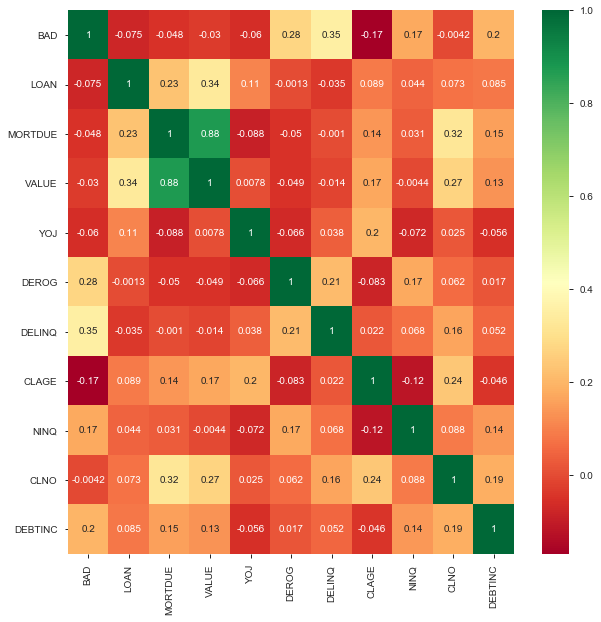

In [14]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

__Interpretation__:

Variables related to the credit history (DELINQ, DEROG, NINQ) are the most correlated with the loan status (BAD), respectivly ($ \rho = 0.35, \rho = 0.28, \rho = 0.17$) suggesting that these will be the variables with the most influance on "BAD". 

These variables are also slightly correlated among them, suggesting that some of the information might be redoundant.

As already discussed, (VALUE) or (MORTDUE) do not seem related to (BAD). They are however related to each other and to other variables such as (CLAGE) and (CLNO). This is expected since those variables are clearly related.

#### Data Preparation

In [16]:
def replace_drop_na(data):
    df_no_na = data.dropna()

    # Define which columns should be encoded vs scaled
    columns_to_encode = list(df_no_na.select_dtypes(include = "object"))
    columns_to_scale  = list(df_no_na.select_dtypes(exclude="object").columns) 
    # Instantiate encoder/scaler
    scaler = MinMaxScaler()
    ohe    = OneHotEncoder(sparse=False)
    scaled_columns  = scaler.fit_transform(df_no_na[columns_to_scale]) 
    encoded_columns =    ohe.fit_transform(df_no_na[columns_to_encode])

    # Concatenate (Column-Bind) Processed Columns Back Together
    processed_data = np.concatenate([scaled_columns, encoded_columns], axis=1)
    # storing the new data in a new dataframe and dropping one column for each encoded categorical 
    # variable to avoid  the dummy variable trap
    data_clean_no_na = pd.DataFrame(processed_data,columns = ['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG',
                                                           'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC',
                                                          'REASON_HomeImp',"REASON_debtCon","JOB_mng",
                                                          "JOB_office","JOB_other","JOB_prof","JOB_sales",
                                                          "JOB_self"]).drop(columns=["JOB_mng",
                                                                                     'REASON_HomeImp'])
    return data_clean_no_na

In [17]:
def imputation(data, imputation_mode):
    numeric_features = list(data.select_dtypes(exclude="object").columns)
    # dealing with numerical variables
    numeric_transformer1 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy=imputation_mode)),
    ('scaler',  RobustScaler())])
    # dealing with categorical variables
    categorical_features = list(data.select_dtypes(include = "object"))
    categorical_transformer1 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])
# creating a preprocessor
    preprocessor1 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer1, numeric_features),
        ('cat', categorical_transformer1, categorical_features)])
    data_clean  = pd.DataFrame(preprocessor1.fit_transform(data),columns = ['BAD','LOAN', 'MORTDUE',
                                                                               'VALUE', 'YOJ', 'DEROG',
                                                                'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC',
                                                                'REASON_HomeImp',"REASON_debtCon","JOB_mng",
                                                                "JOB_office","JOB_other","JOB_prof",
                                                                "JOB_sales","JOB_self"]).drop(columns=[
                                                                                "JOB_mng",'REASON_HomeImp'])
    return data_clean

### From Modeling to evaluation

#### Useful functions for the modeling process

In [18]:
class SwitchAlgo(BaseEstimator):
    def __init__(self, estimator):
        self.estimator = estimator
        
    def fit(self, X, y=None):
        self.estimator.fit(X, y)
        return self


    def predict(self, X):
        return self.estimator.predict(X)


    def predict_proba(self, X,y):
        DefaultProba = self.estimator.predict_proba(X)
        prediction = self.predict(X)
        DefaultProba = DefaultProba[:,1]
        result = pd.concat ([pd.DataFrame(DefaultProba, index =X.index ,columns = ["Probability"]),
            pd.DataFrame(prediction, index = y.index, columns =["Prediction"])],
           axis=1).head(10)
        return result


    def score(self, X, y):
        return self.estimator.score(X, y)
    
    def confusionMatrix(self, ytest, X):
        y_pred = self.predict(X)
        cm = confusion_matrix(ytest, y_pred)
        labels = ["GOOD","BAD"]
        
        df = pd.DataFrame()
        for i, row_label in enumerate(labels):
            rowdata={}
            for j, col_label in enumerate(labels): 
                rowdata[col_label]=cm[i,j]
            df = df.append(pd.DataFrame.from_dict({row_label:rowdata}, orient='index'))
        return df[labels]

    
    def report(self,ytest,X):
        y_pred = self.predict(X)
        report_df = pd.DataFrame(classification_report(y_true = ytest, y_pred =  y_pred, output_dict=True)).transpose()
        return report_df

In [19]:
def Modeling_one(df,algo):
    X=df.iloc[:,1:18]
    y=df.iloc[:,0:1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 15)
    model = SwitchAlgo(algo)
    
    fitted = model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    score = model.score(X_test,y_test)
    result = model.predict_proba(X_test, y_test)
    cm = model.confusionMatrix(y_test, X_test)
    report = model.report(y_test, X_test)
    tune_depth_estimator(X_train,y_train,algo)
    f = f1_score(y_test, y_pred, average=None)
    roc = plot_roc(y_test, y_pred,algo)
    aff = display('Score ='  , score ,'Confusion matrix = ',cm,'Classification Report',report,'Default Probability', result, roc)
    return aff,y_pred, fitted, score,f, y_test

In [20]:
def Modeling(df,algo,imputer = None):
    if imputer == None:
        dff = replace_drop_na(df)
    elif imputer == 'median' or imputer == 'mean':
        dff = imputation(df, imputer)
    aff, y_pred, fitted,score ,f,y_test= Modeling_one(dff,algo)
    return aff, y_pred, fitted,score,f,y_test

In [21]:
def tune_depth_estimator(x,y,algo):
    from sklearn.model_selection import StratifiedKFold
    from sklearn.model_selection import GridSearchCV
    model = algo

    n_estimators = [50, 100, 150, 200]
    max_depth = [2,3, 4,5, 6, 8]
    #print(max_depth)
    param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
    grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
    grid_result = grid_search.fit(x,y)


    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']


    scores = np.array(means).reshape(len(max_depth), len(n_estimators))
    for i, value in enumerate(max_depth):
        plt.plot(n_estimators, scores[i], label='depth: ' + str(value))
    plt.legend()
    plt.xlabel('n_estimators')
    plt.ylabel('Log Loss')

In [22]:
def plot_roc(y_test, y_pred,algo):
    fpr1, tpr1, threshold1 = roc_curve(y_test, y_pred) 
    roc_auc1 = auc(fpr1, tpr1)
    plt.figure(figsize=(6,5)) 
    plt.plot(fpr1, tpr1, color='g', lw=2, label= '(area = %0.2f)'% roc_auc1)
    plt.plot([0, 1], [0, 1], color='red', lw=2, label = 'Baseline',linestyle='--') 
    plt.xlim([-0.01, 1.01]) 
    plt.ylim([0.0, 1.05]) 
    plt.xlabel('False Positive Rate') 
    plt.ylabel('True Positive Rate') 
    plt.title('Classifiers ROC curves') 
    plt.legend(loc = "lower right")
    plt.show()

### Modeling

In [23]:
pred = []
f = []

#### Gradient Boost Classifier

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   22.1s finished


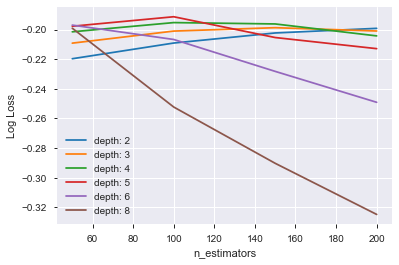

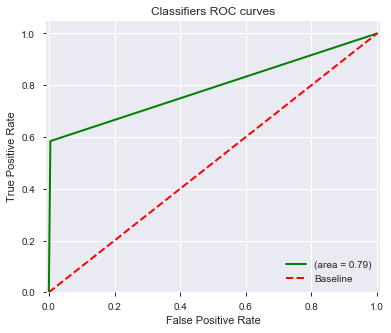

'Score ='

0.9643463497453311

'Confusion matrix = '

,GOOD,BAD
GOOD,1084,5
BAD,37,52


'Classification Report'

,f1-score,precision,recall,support
0.0,0.980995,0.966994,0.995409,1089.000000
1.0,0.712329,0.912281,0.584270,89.000000
accuracy,0.964346,0.964346,0.964346,0.964346
macro avg,0.846662,0.939637,0.789839,1178.000000
weighted avg,0.960697,0.962860,0.964346,1178.000000


'Default Probability'

,Probability,Prediction
2227,0.232347,0.0
725,0.006100,0.0
1122,0.006603,0.0
2829,0.007739,0.0
3189,0.997064,1.0
2150,0.041275,0.0
1901,0.059706,0.0
164,0.040684,0.0
2018,0.024338,0.0
1927,0.007299,0.0


None

In [24]:
aff1, y_pred1, fitted1,score1,f1,y_test1= Modeling(data,GradientBoostingClassifier(n_estimators=150, max_depth = 4), imputer = None)
pred.append(score1)
f.append(f1)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 210 tasks      | elapsed:   25.8s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   38.7s finished


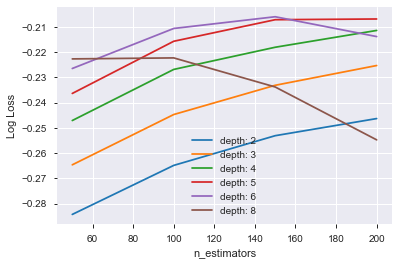

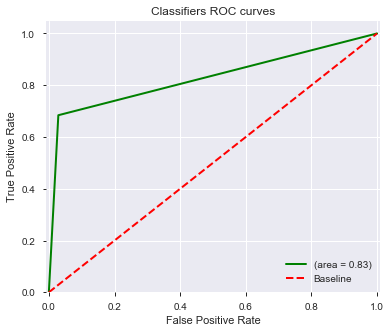

'Score ='

0.9079578139980825

'Confusion matrix = '

,GOOD,BAD
GOOD,1580,47
BAD,145,314


'Classification Report'

,f1-score,precision,recall,support
0.0,0.942721,0.915942,0.971112,1627.000000
1.0,0.765854,0.869806,0.684096,459.000000
accuracy,0.907958,0.907958,0.907958,0.907958
macro avg,0.854287,0.892874,0.827604,2086.000000
weighted avg,0.903803,0.905790,0.907958,2086.000000


'Default Probability'

,Probability,Prediction
3180,0.012946,0.0
3812,0.749828,1.0
1325,0.900635,1.0
3606,0.011836,0.0
1990,0.058884,0.0
231,0.013235,0.0
3303,0.058155,0.0
3611,0.007720,0.0
2695,0.886599,1.0
2468,0.340296,0.0


None

In [25]:
aff11, y_pred11, fitted11,score11,f11,y_test11 = Modeling(data,GradientBoostingClassifier(n_estimators=200, max_depth = 5),imputer = 'mean')
pred.append(score11)
f.append(f11)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 210 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   39.6s finished


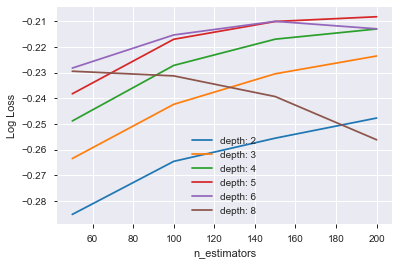

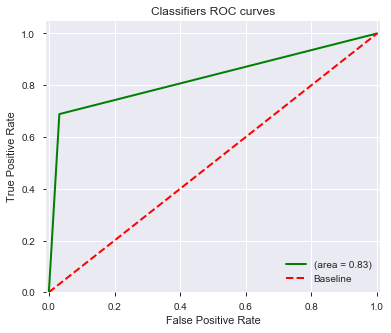

'Score ='

0.9065196548418025

'Confusion matrix = '

,GOOD,BAD
GOOD,1575,52
BAD,143,316


'Classification Report'

,f1-score,precision,recall,support
0.0,0.941704,0.916764,0.968039,1627.00000
1.0,0.764208,0.858696,0.688453,459.00000
accuracy,0.906520,0.906520,0.906520,0.90652
macro avg,0.852956,0.887730,0.828246,2086.00000
weighted avg,0.902648,0.903986,0.906520,2086.00000


'Default Probability'

,Probability,Prediction
3180,0.011095,0.0
3812,0.510567,1.0
1325,0.907596,1.0
3606,0.005914,0.0
1990,0.036138,0.0
231,0.009745,0.0
3303,0.043734,0.0
3611,0.080758,0.0
2695,0.820991,1.0
2468,0.304443,0.0


None

In [26]:
aff111, y_pred111, fitted111,score111,f111,y_test111 = Modeling(data,GradientBoostingClassifier(n_estimators=200, max_depth = 5),imputer = 'median')
pred.append(score111)
f.append(f111)

#### XGBOOST

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   22.7s finished


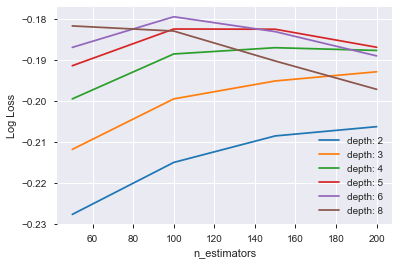

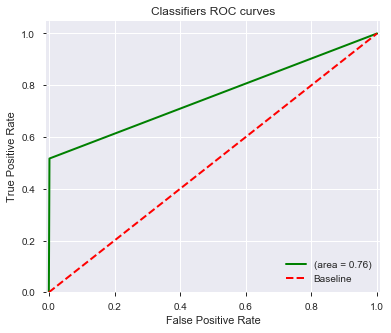

'Score ='

0.9617996604414262

'Confusion matrix = '

,GOOD,BAD
GOOD,1087,2
BAD,43,46


'Classification Report'

,f1-score,precision,recall,support
0.0,0.979721,0.961947,0.998163,1089.0000
1.0,0.671533,0.958333,0.516854,89.0000
accuracy,0.961800,0.961800,0.961800,0.9618
macro avg,0.825627,0.960140,0.757509,1178.0000
weighted avg,0.956436,0.961674,0.961800,1178.0000


'Default Probability'

,Probability,Prediction
2227,0.414678,0.0
725,0.003869,0.0
1122,0.003227,0.0
2829,0.003581,0.0
3189,0.996794,1.0
2150,0.037647,0.0
1901,0.059038,0.0
164,0.134413,0.0
2018,0.011975,0.0
1927,0.019862,0.0


None

In [27]:
aff2, y_pred2, fitted2,score2,f2, y_test2 = Modeling(data,xgb.XGBClassifier(n_estimators=150, max_depth = 5),imputer = None)
pred.append(score2)
f.append(f2)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   28.0s finished


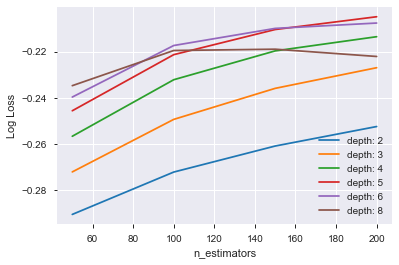

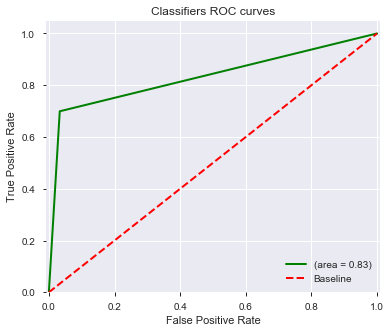

'Score ='

0.9079578139980825

'Confusion matrix = '

,GOOD,BAD
GOOD,1573,54
BAD,138,321


'Classification Report'

,f1-score,precision,recall,support
0.0,0.942481,0.919345,0.966810,1627.000000
1.0,0.769784,0.856000,0.699346,459.000000
accuracy,0.907958,0.907958,0.907958,0.907958
macro avg,0.856132,0.887673,0.833078,2086.000000
weighted avg,0.904481,0.905407,0.907958,2086.000000


'Default Probability'

,Probability,Prediction
3180,0.003897,0.0
3812,0.615546,1.0
1325,0.952696,1.0
3606,0.006950,0.0
1990,0.073703,0.0
231,0.039006,0.0
3303,0.058352,0.0
3611,0.011062,0.0
2695,0.892964,1.0
2468,0.377524,0.0


None

In [28]:
aff22, y_pred22, fitted22,score22 ,f22, y_test22= Modeling(data,xgb.XGBClassifier(n_estimators=200, max_depth = 5),imputer = 'mean')
pred.append(score22)
f.append(f22)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   28.6s finished


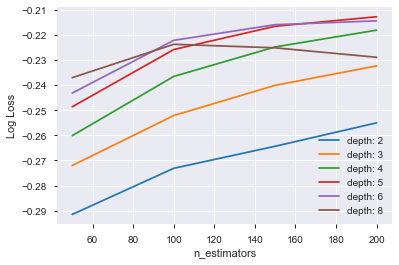

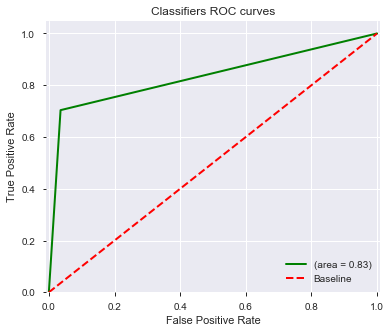

'Score ='

0.9069990412272292

'Confusion matrix = '

,GOOD,BAD
GOOD,1569,58
BAD,136,323


'Classification Report'

,f1-score,precision,recall,support
0.0,0.941777,0.920235,0.964352,1627.000000
1.0,0.769048,0.847769,0.703704,459.000000
accuracy,0.906999,0.906999,0.906999,0.906999
macro avg,0.855412,0.884002,0.834028,2086.000000
weighted avg,0.903770,0.904289,0.906999,2086.000000


'Default Probability'

,Probability,Prediction
3180,0.005092,0.0
3812,0.161573,0.0
1325,0.933503,1.0
3606,0.006607,0.0
1990,0.050295,0.0
231,0.021563,0.0
3303,0.042888,0.0
3611,0.109443,0.0
2695,0.806116,1.0
2468,0.241381,0.0


None

In [29]:
aff222, y_pred222, fitted222,score222, f222 , y_test222= Modeling(data,xgb.XGBClassifier(n_estimators=200, max_depth = 5),imputer = 'median')
pred.append(score222)
f.append(f222)

#### Random Forest

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   12.8s finished


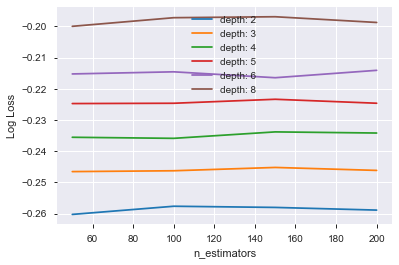

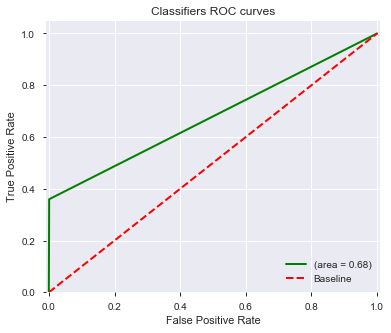

'Score ='

0.9507640067911715

'Confusion matrix = '

,GOOD,BAD
GOOD,1088,1
BAD,57,32


'Classification Report'

,f1-score,precision,recall,support
0.0,0.974038,0.950218,0.999082,1089.000000
1.0,0.524590,0.969697,0.359551,89.000000
accuracy,0.950764,0.950764,0.950764,0.950764
macro avg,0.749314,0.959958,0.679316,1178.000000
weighted avg,0.940081,0.951690,0.950764,1178.000000


'Default Probability'

,Probability,Prediction
2227,0.095995,0.0
725,0.035519,0.0
1122,0.032425,0.0
2829,0.040176,0.0
3189,0.940216,1.0
2150,0.050351,0.0
1901,0.061764,0.0
164,0.107110,0.0
2018,0.038259,0.0
1927,0.036247,0.0


None

In [30]:
aff3, y_pred3, fitted3,score3,f3, y_test3 = Modeling(data,RandomForestClassifier(n_estimators=100, max_depth = 8),imputer = None)
pred.append(score3)
f.append(f3)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 212 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   16.9s finished


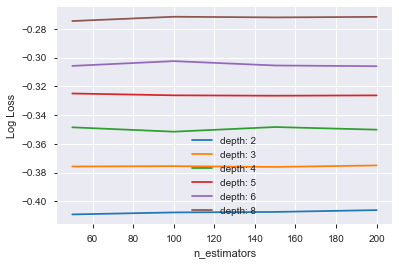

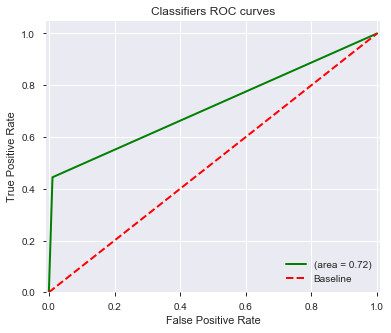

'Score ='

0.8691275167785235

'Confusion matrix = '

,GOOD,BAD
GOOD,1609,18
BAD,255,204


'Classification Report'

,f1-score,precision,recall,support
0.0,0.921799,0.863197,0.988937,1627.000000
1.0,0.599119,0.918919,0.444444,459.000000
accuracy,0.869128,0.869128,0.869128,0.869128
macro avg,0.760459,0.891058,0.716691,2086.000000
weighted avg,0.850797,0.875458,0.869128,2086.000000


'Default Probability'

,Probability,Prediction
3180,0.057369,0.0
3812,0.321592,0.0
1325,0.760961,1.0
3606,0.043772,0.0
1990,0.109931,0.0
231,0.078907,0.0
3303,0.097052,0.0
3611,0.115391,0.0
2695,0.520271,1.0
2468,0.173610,0.0


None

In [31]:
aff33, y_pred33, fitted33,score33,f33, y_test33 = Modeling(data,RandomForestClassifier(n_estimators=100, max_depth = 8),imputer = 'mean')
pred.append(score33)
f.append(f33)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   16.2s finished


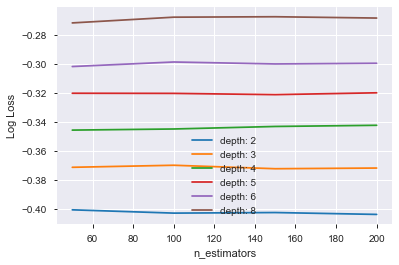

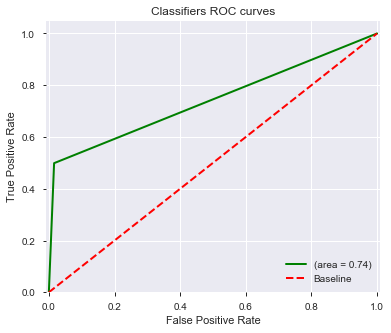

'Score ='

0.8772770853307766

'Confusion matrix = '

,GOOD,BAD
GOOD,1601,26
BAD,230,229


'Classification Report'

,f1-score,precision,recall,support
0.0,0.925969,0.874386,0.984020,1627.000000
1.0,0.641457,0.898039,0.498911,459.000000
accuracy,0.877277,0.877277,0.877277,0.877277
macro avg,0.783713,0.886212,0.741465,2086.000000
weighted avg,0.863365,0.879590,0.877277,2086.000000


'Default Probability'

,Probability,Prediction
3180,0.053142,0.0
3812,0.356387,0.0
1325,0.824186,1.0
3606,0.036784,0.0
1990,0.122162,0.0
231,0.045671,0.0
3303,0.114251,0.0
3611,0.348403,0.0
2695,0.501830,1.0
2468,0.132329,0.0


None

In [32]:
aff333, y_pred333, fitted333,score333,f333 , y_test333= Modeling(data,RandomForestClassifier(n_estimators=100, max_depth = 8),imputer = 'median')
pred.append(score333)
f.append(f333)

### Evaluation

In [33]:
algorithms = ["Gradient Boost Classifier","XGBoost","Random Forest Classifier"]
imputer = ["no NaN","Mean","Median"]

df0 = pd.DataFrame([pred[0:3],pred[3:6],pred[6:10]], algorithms, imputer)
df00 = pd.concat(
    [pd.concat(
        [df0],
        keys=['Methods used to deal with missing values'], axis=1)],
        keys=['Model Score']
)

df1 = pd.DataFrame([f[0:3][0][0],f[3:6][0][0],f[6:10][0][0]], algorithms, ['GOOD'])
df11 = pd.DataFrame([f[0:3][0][1],f[3:6][0][1],f[6:10][0][1]], algorithms, ['BAD'])
df111 = pd.concat([df1,df11], axis = 1)
df1111= pd.concat(
    [pd.concat(
        [df111],
        keys=['Droppig Missing Vlaues'], axis=1)],
        keys=['F score']
)
df2 = pd.DataFrame([f[1:4][0][0],f[4:7][0][0],f[7:8][0][0]], algorithms, ['GOOD'])
df22 = pd.DataFrame([f[1:4][0][1],f[4:7][0][1],f[7:8][0][1]], algorithms, ['BAD'])
df222 = pd.concat([df2,df22], axis = 1)
df2222 = pd.concat(
    [pd.concat(
        [df222],
        keys=['Replacing Missing Vlaues with Mean'], axis=1)],
        keys=['F score']
)

df3 = pd.DataFrame([f[2:3][0][0],f[5:6][0][0],f[8:9][0][0]], algorithms, ['GOOD'])
df33 = pd.DataFrame([f[2:3][0][1],f[5:6][0][1],f[8:9][0][1]], algorithms, ['BAD'])
df333 = pd.concat([df3,df33], axis = 1)
df3333 = pd.concat(
    [pd.concat(
        [df333],
        keys=['Replacing Missing Vlaues with Median'], axis=1)],
        keys=['F score']
)

In [34]:
display(df00,df1111,df2222,df3333)

Methods used to deal with missing values  \
                                                                        no NaN   
Model Score Gradient Boost Classifier                                 0.964346   
            XGBoost                                                   0.961800   
            Random Forest Classifier                                  0.950764   

                                                           
                                           Mean    Median  
Model Score Gradient Boost Classifier  0.907958  0.906520  
            XGBoost                    0.907958  0.906999  
            Random Forest Classifier   0.869128  0.877277

Droppig Missing Vlaues          
                                                    GOOD       BAD
F score Gradient Boost Classifier               0.980995  0.712329
        XGBoost                                 0.979721  0.671533
        Random Forest Classifier                0.974038  0.524590

Replacing Missing Vlaues with Mean          
                                                                GOOD       BAD
F score Gradient Boost Classifier                           0.942721  0.765854
        XGBoost                                             0.942481  0.769784
        Random Forest Classifier                            0.921799  0.599119

Replacing Missing Vlaues with Median  \
                                                                  GOOD   
F score Gradient Boost Classifier                             0.941704   
        XGBoost                                               0.941777   
        Random Forest Classifier                              0.925969   

                                             
                                        BAD  
F score Gradient Boost Classifier  0.764208  
        XGBoost                    0.769048  
        Random Forest Classifier   0.641457

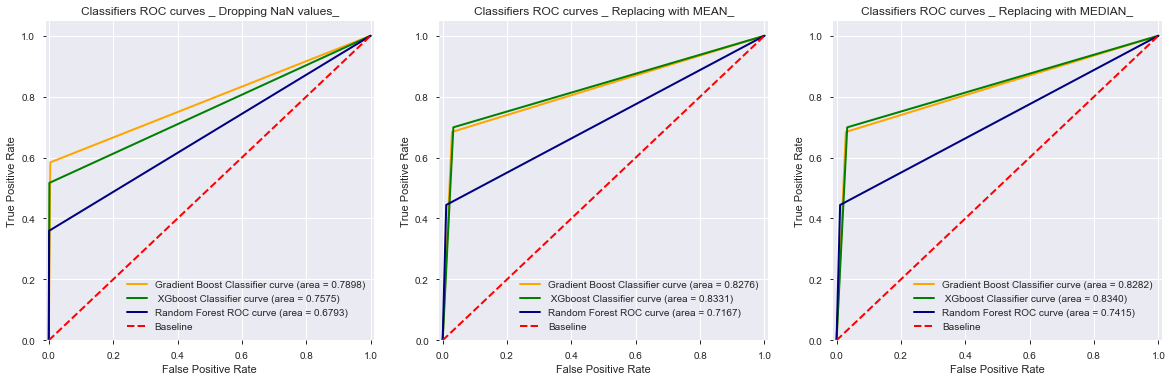

In [35]:
# Dropping Missing Values
fpr1, tpr1, threshold1 = roc_curve(y_test1, y_pred1) 
roc_auc1 = auc(fpr1, tpr1)
fpr2, tpr2, threshold2 = roc_curve(y_test2, y_pred2) 
roc_auc2 = auc(fpr2, tpr2)
fpr3, tpr3, threshold3 = roc_curve(y_test3, y_pred3)
roc_auc3 = auc(fpr3, tpr3)
fig = plt.figure(figsize=(20,20)) 
ax1 = fig.add_subplot(331)
p1 = ax1.plot(fpr1, tpr1, color='orange', lw=2, label='Gradient Boost Classifier curve (area = %0.4f)'% roc_auc1)
p2 = ax1.plot(fpr2, tpr2, color='green', lw=2, label=' XGboost Classifier curve (area = %0.4f)'% roc_auc2)
p3 = ax1.plot(fpr3, tpr3, color='navy', lw=2, label='Random Forest ROC curve (area = %0.4f)'% roc_auc3)
plt.plot([0, 1], [0, 1], color='red', lw=2, label = 'Baseline',linestyle='--') 
plt.xlim([-0.01, 1.01]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Classifiers ROC curves _ Dropping NaN values_') 
plt.legend(loc = "lower right")
 
# Replacing NaN with mean
fpr11, tpr11, threshold11 = roc_curve(y_test11, y_pred11) 
roc_auc11 = auc(fpr11, tpr11)
fpr22, tpr22, threshold22 = roc_curve(y_test22, y_pred22) 
roc_auc22 = auc(fpr22, tpr22)
fpr33, tpr33, threshold33 = roc_curve(y_test33, y_pred33)
roc_auc33 = auc(fpr33, tpr33)
ax1 = fig.add_subplot(332)
p1 = ax1.plot(fpr11, tpr11, color='orange', lw=2, label='Gradient Boost Classifier curve (area = %0.4f)'% roc_auc11)
p2 = ax1.plot(fpr22, tpr22, color='green', lw=2, label=' XGboost Classifier curve (area = %0.4f)'% roc_auc22)
p3 = ax1.plot(fpr33, tpr33, color='navy', lw=2, label='Random Forest ROC curve (area = %0.4f)'% roc_auc33)
plt.plot([0, 1], [0, 1], color='red', lw=2, label = 'Baseline',linestyle='--') 
plt.xlim([-0.01, 1.01]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Classifiers ROC curves _ Replacing with MEAN_') 
plt.legend(loc = "lower right")

# Replacing with median
fpr111, tpr111, threshold111 = roc_curve(y_test111, y_pred111) 
roc_auc111 = auc(fpr111, tpr111)
fpr222, tpr222, threshold222 = roc_curve(y_test222, y_pred222) 
roc_auc222 = auc(fpr222, tpr222)
fpr333, tpr333, threshold333 = roc_curve(y_test333, y_pred333)
roc_auc333 = auc(fpr333, tpr333)
ax1 = fig.add_subplot(333)
p1 = ax1.plot(fpr11, tpr11, color='orange', lw=2, label='Gradient Boost Classifier curve (area = %0.4f)'% roc_auc111)
p2 = ax1.plot(fpr22, tpr22, color='green', lw=2, label=' XGboost Classifier curve (area = %0.4f)'% roc_auc222)
p3 = ax1.plot(fpr33, tpr33, color='navy', lw=2, label='Random Forest ROC curve (area = %0.4f)'% roc_auc333)

plt.plot([0, 1], [0, 1], color='red', lw=2, label = 'Baseline',linestyle='--') 
plt.xlim([-0.01, 1.01]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Classifiers ROC curves _ Replacing with MEDIAN_') 
plt.legend(loc = "lower right")
plt.show()